In [9]:
import sys
sys.path.append('..')
from src import plot
from src import structures
import jax.numpy as jnp
import matplotlib.pyplot as plt
from typing import List, Optional
from src.plot import plot_curves, plot_curve_with_std, plot_single_solution, plot_multiple_solutions, curves_to_curve_with_std
from dataset_module import PoissonDataset

In [53]:
loss = jnp.exp(-jnp.linspace(0, 1, 1000))
items = range(loss.shape[0])


## plot curves

In [54]:
def plot_curves(curves: List[structures.Curve], title: Optional[str] = None,
                mode: str = "dark", ax: Optional[plt.Axes] = None) -> plt.Axes:
    plot.set_style(mode)
    
    if ax is None:
        fig, ax = plt.subplots()
    
    if title is not None:
        ax.set_title(title)

    for curve in curves:
        ax.plot(curve.items, curve.values, label=curve.legend)
    
    ax.set_yscale('log')
    ax.legend()
    
    return ax



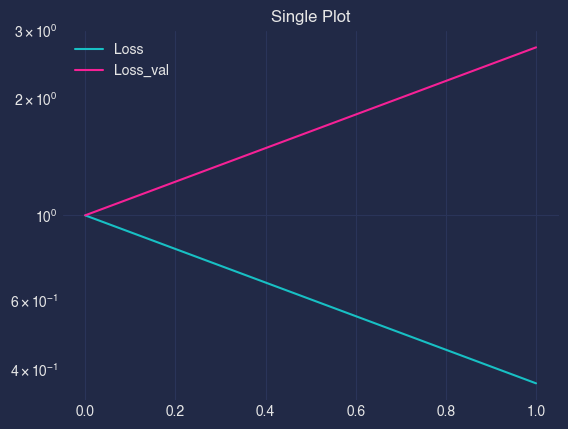

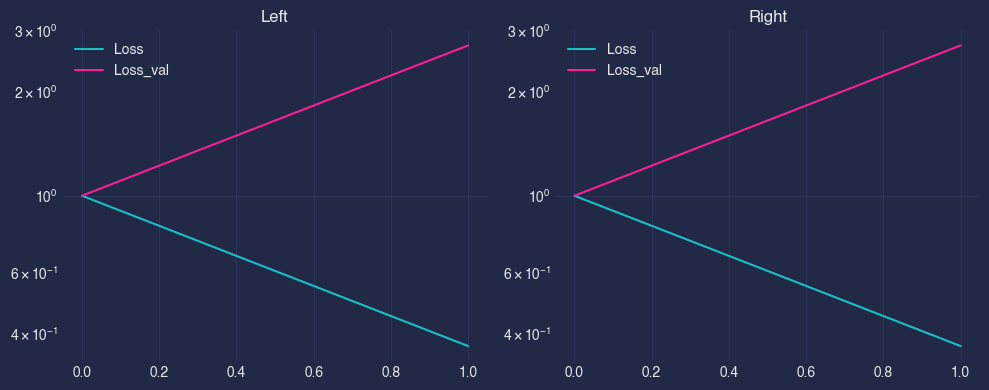

In [2]:

curves = [structures.Curve(jnp.exp(-jnp.linspace(0, 1, 1000)), jnp.linspace(0, 1, 1000), "Loss"),
          structures.Curve(jnp.exp(jnp.linspace(0, 1, 1000)), jnp.linspace(0, 1, 1000), "Loss_val")
          ]
# single plot
ax = plot_curves(curves, title="Single Plot")
plt.show()

# multiple plotss
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_curves(curves, title="Left", ax=axs[0])
plot_curves(curves, title="Right", ax=axs[1])
plt.tight_layout()
plt.show()


## Curve with variance

In [56]:
def curves_to_curve_with_std(curves: List[structures.Curve]) -> structures.CurveWithStd:
    mean = jnp.array([curve.values for curve in curves]).mean(axis=0)
    std = jnp.array([curve.values for curve in curves]).std(axis=0)
    return structures.CurveWithStd(mean, std, curves[0].items, curves[0].legend)

curves = [structures.Curve(jnp.exp(-jnp.linspace(0, 1, 1000)), jnp.linspace(0, 1, 1000), "Loss"),
          structures.Curve(jnp.exp(jnp.linspace(0, 1, 1000)), jnp.linspace(0, 1, 1000), "Loss_val")
          ]
curve_with_std = [curves_to_curve_with_std(curves), curves_to_curve_with_std(curves)]


In [57]:
def plot_curve_with_std(curves_with_std: List[structures.CurveWithStd], title: Optional[str] = None,
                       mode: str = "dark", ax: Optional[plt.Axes] = None) -> plt.Axes:
    plot.set_style(mode)

    if ax is None:
        fig, ax = plt.subplots()
    
    if title is not None:
        ax.set_title(title)
    for curve_with_std in curves_with_std:
        ax.plot(curve_with_std.items, curve_with_std.mean, label=curve_with_std.legend)
        ax.fill_between(curve_with_std.items, curve_with_std.mean - curve_with_std.std, curve_with_std.mean + curve_with_std.std, alpha=0.2)
    ax.legend()
    return ax


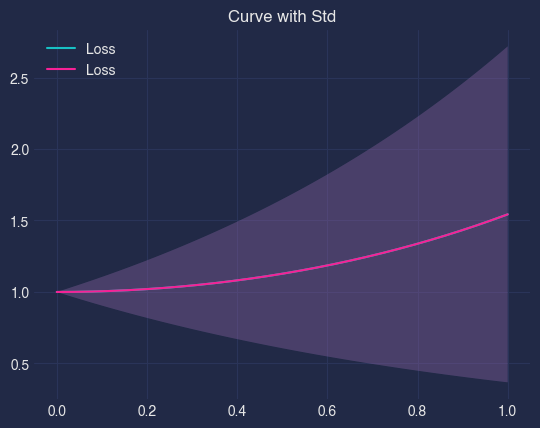

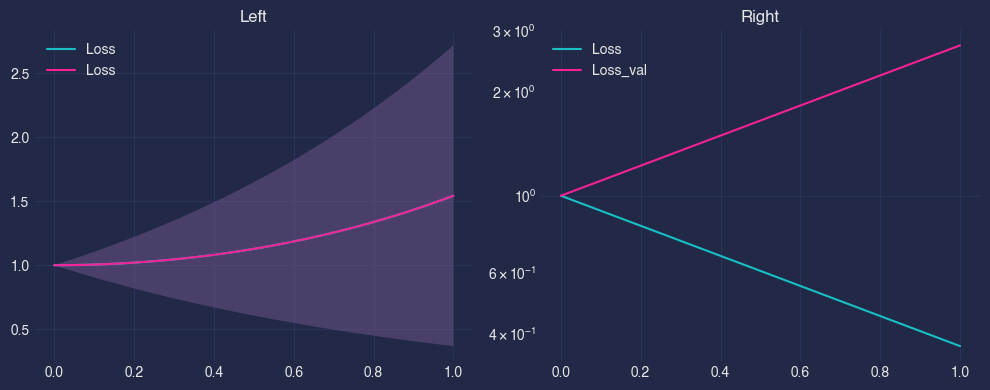

In [3]:
curves = [structures.Curve(jnp.exp(-jnp.linspace(0, 1, 1000)), jnp.linspace(0, 1, 1000), "Loss"),
          structures.Curve(jnp.exp(jnp.linspace(0, 1, 1000)), jnp.linspace(0, 1, 1000), "Loss_val")
          ]
curve_with_std = [curves_to_curve_with_std(curves), curves_to_curve_with_std(curves)]

ax = plot_curve_with_std(curve_with_std, title="Curve with Std")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_curve_with_std(curve_with_std, title="Left", ax=axs[0])
plot_curves(curves, title="Right", ax=axs[1])

plt.tight_layout()
plt.show()



## Solutions

(25, 25)


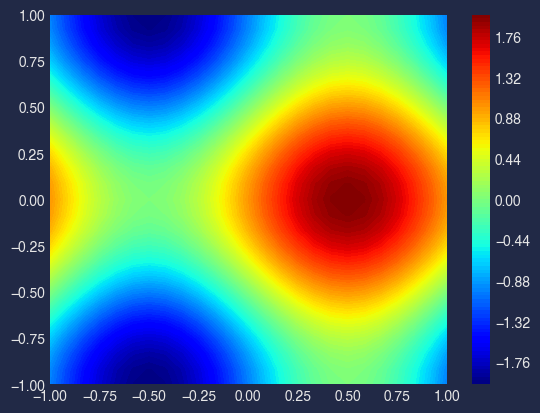

In [5]:
x = jnp.linspace(-1, 1, 25)
y = jnp.linspace(-1, 1, 25)
X, Y = jnp.meshgrid(x, y)

def f(x, y):
    return jnp.sin(x * jnp.pi) + jnp.cos(y * jnp.pi)

u = f(X, Y)

print(u.shape)

plt.contourf(X, Y, u, levels=100, cmap="jet")
plt.colorbar()
plt.show()

solution = structures.Solution(u, X, Y, "Solution")
prediction = structures.Solution(u, X, Y, "Prediction")




In [60]:
def plot_single_solution(solution: structures.Solution, title: Optional[str] = None,
                         mode: str = "dark", ax: Optional[plt.Axes] = None) -> plt.Axes:
    plot.set_style(mode)

    if ax is None:
        fig, ax = plt.subplots()

    if title is not None:
        ax.set_title(title)

    if "Error" in title:
        cmap = "inferno"
    else:
        cmap = "jet"
    contour = ax.contourf(solution.x, solution.y, solution.values, levels=100, cmap=cmap)
    plt.colorbar(contour, ax=ax)
 
    return ax
     

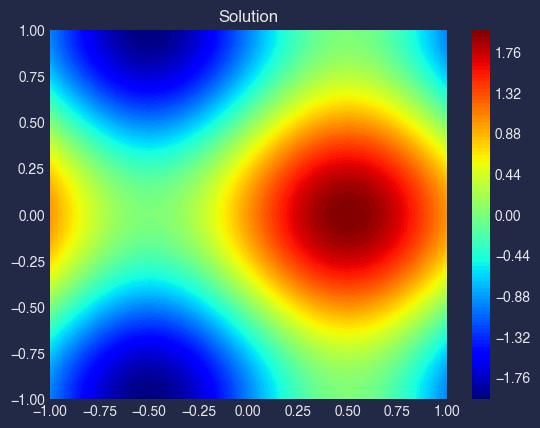

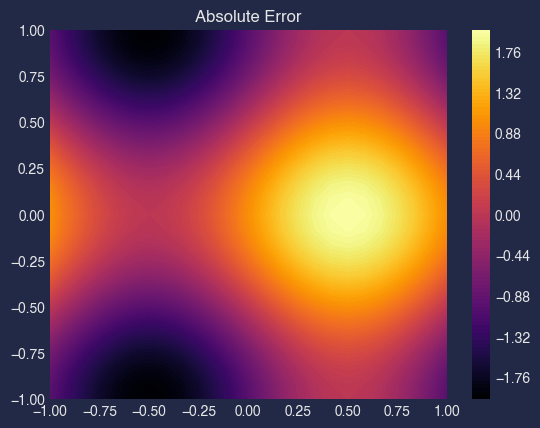

In [6]:
ax = plot_single_solution(solution, title="Solution")
plt.show()

ax = plot_single_solution(prediction, title="Absolute Error")
plt.show()



In [ ]:
def plot_multiple_solutions(item_1: List[structures.Solution], item_2: List[structures.Solution], item_3: List[structures.Solution], title: Optional[str] = None,
                            columnwise_titles: Optional[List[str]] = None,
                            mode: str = "dark") -> plt.Axes:
    plot.set_style(mode)

    fig, axs = plt.subplots(len(item_1), 3, figsize=(len(item_1)*10, 3))

    if len(axs.shape) == 1:
        axs = axs.reshape(1,-3)
    if columnwise_titles is None:
        for i in range(len(item_1)):
            plot_single_solution(item_1[i], title=f"Prediction {i*3 + 0}", ax=axs[i, 0])
            plot_single_solution(item_2[i], title=f"Prediction {i*3 + 1}", ax=axs[i, 1])
            plot_single_solution(item_3[i], title=f"Prediction {i*3 + 2}", ax=axs[i, 2])
    else:
        for i in range(len(item_1)):
            plot_single_solution(item_1[i], title=columnwise_titles[0], ax=axs[i, 0])
            plot_single_solution(item_2[i], title=columnwise_titles[1], ax=axs[i, 1])
            plot_single_solution(item_3[i], title=columnwise_titles[2], ax=axs[i, 2])

    if title:
        fig.suptitle(title, fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.97])  # allow space for suptitle

    return fig


# save here
#fig.savefig("prediction.png")

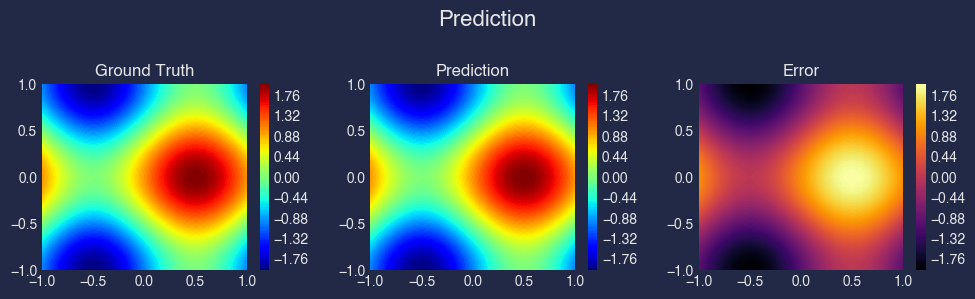

In [7]:
columnwise_titles = ["Ground Truth", "Prediction", "Error"]
fig = plot_multiple_solutions([prediction], [prediction], [prediction], title="Prediction", columnwise_titles=columnwise_titles)


In [10]:
# Test on dataset Module
dataset = PoissonDataset()
dataset.initialize()


Found existing dataset at: /Users/et-mls/.poisson_dataset
Dataset path: /Users/et-mls/.poisson_dataset
Number of wave number combinations: 11
Parameters: kx=1.0, ky=1.0
Parameters: kx=1.0, ky=1.5
Parameters: kx=1.0, ky=2.0
Parameters: kx=1.0, ky=2.5
Parameters: kx=1.5, ky=1.0
Parameters: kx=1.5, ky=1.5
Parameters: kx=1.5, ky=2.0
Parameters: kx=1.5, ky=2.5
Parameters: kx=2.0, ky=1.0
Parameters: kx=2.0, ky=1.5
Parameters: kx=2.0, ky=2.0


In [ ]:
dataset.get_statistics(0).keys()

losses_mean = dataset.get_statistics(0)["losses_mean"]
losses_std = dataset.get_statistics(0)["losses_std"]

curves_with_std = CurvesWithStd(
    mean=losses_mean,
    std=losses_std,
    legend="Loss"
) 





NameError: name 'CurvesWithStd' is not defined